In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df_scores = pd.read_csv('../Dataset/DotSlash_Scores.csv')

In [46]:
df_scores

,SRN,Full Name,Course,Faculty,Score,Year
0,PES1UG20CS682,Rohan T P,AIWR,Divyashree,95,2020
1,PES1UG20CS690,Shivangouda I Patil,AIWR,Divyashree,81,2020
2,PES1UG20CS330,REDDYGARI SURYA TEJA REDDY,AIWR,Divyashree,70,2020
3,PES1UG20CS687,Satvikkumar,AIWR,Divyashree,91,2019
4,PES1UG21CS818,Manjula Kamannavar,AIWR,Divyashree,59,2020
...,...,...,...,...,...,...
780,PES1UG20CS707,SUNIDHI N,IPNP,Surabhi,59,2020
781,PES1UG20CS805,Dhanush V,IPNP,Surabhi,90,2019
782,PES1UG20EC200,SREERAMYA DHARANI PRAGADA,IPNP,Surabhi,92,2020
783,PES1UG21CS813,Hathi Dev Rajeshbhai,IPNP,Surabhi,63,2020


In [47]:
df_scores.describe()

,Score,Year
count,785.000000,785.000000
mean,62.970701,2019.492994
std,22.009284,0.500270
min,25.000000,2019.000000
25%,44.000000,2019.000000
50%,64.000000,2019.000000
75%,82.000000,2020.000000
max,100.000000,2020.000000


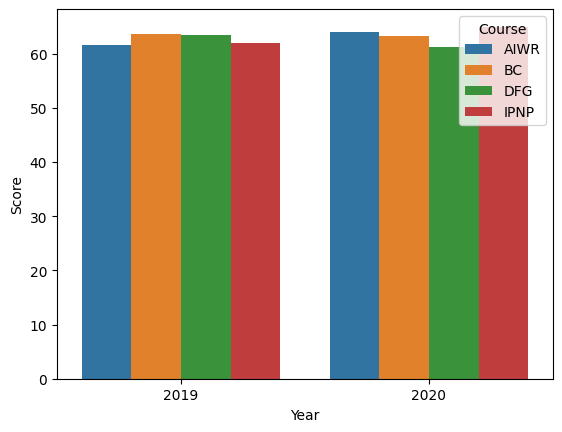

In [48]:
df_avg = df_scores.groupby(['Year', 'Course'])['Score'].mean().reset_index()


sns.barplot(data=df_avg, x='Year', y='Score', hue='Course')
plt.show()


In [49]:
df_scores_2019 = df_scores[df_scores['Year']==2019]
df_scores_2020 = df_scores[df_scores['Year']==2020]

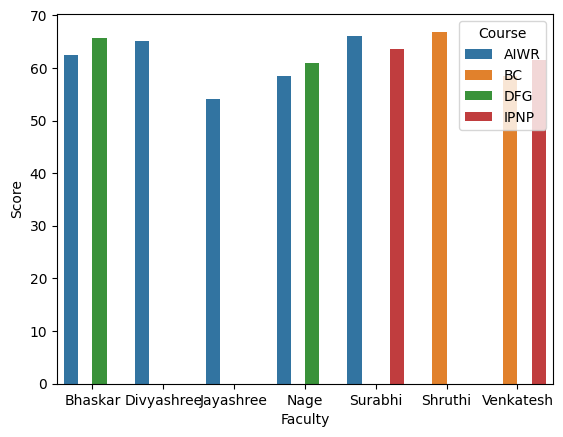

In [50]:
df_avg_faculty_2019 = df_scores_2019.groupby(['Course','Faculty'])['Score'].mean().reset_index()


sns.barplot(data=df_avg_faculty_2019, x='Faculty', y='Score', hue='Course')
plt.show()

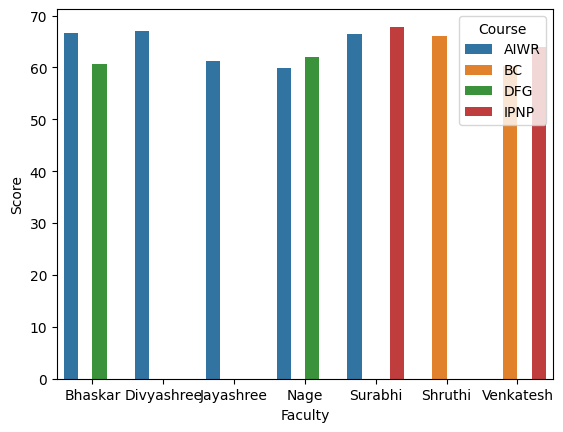

In [51]:
df_avg_faculty_2020 = df_scores_2020.groupby(['Course','Faculty'])['Score'].mean().reset_index()


sns.barplot(data=df_avg_faculty_2020, x='Faculty', y='Score', hue='Course')
plt.show()

In [52]:

df_pct_2019 = df_scores_2019.groupby('Course')['SRN'].count() / df_scores_2019['SRN'].count() * 100


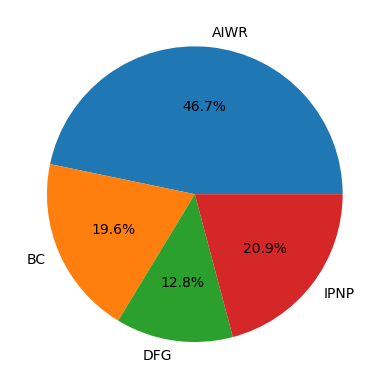

In [53]:
plt.pie(df_pct_2019, labels=df_pct_2019.index, autopct='%.1f%%')
plt.show()

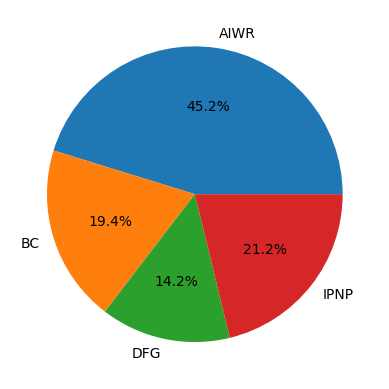

In [54]:
df_pct_2020 = df_scores_2020.groupby('Course')['SRN'].count() / df_scores_2020['SRN'].count() * 100

plt.pie(df_pct_2020, labels=df_pct_2020.index, autopct='%.1f%%')
plt.show()

In [55]:
df_feedback = pd.read_csv('../Dataset/DotSlash_Feedback.csv')

In [56]:
df_feedback_course = df_feedback[['Course','Degree of difficulty of assignments','Structuring of the course','Course recommendation based on relevance']]

In [57]:
df_grouped = df_feedback_course.groupby('Course').mean().reset_index()

In [58]:
from pyecharts import options as opts
from pyecharts.charts import Radar

radar = (
    Radar()
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name='Degree of difficulty of assignments', max_=100),
            opts.RadarIndicatorItem(name='Structuring of the course', max_=100),
            opts.RadarIndicatorItem(name='Course recommendation based on relevance', max_=100),
        ]
    )
)


In [59]:
for i, row in df_grouped.iterrows():
    radar.add(
        series_name=row['Course'],
        data=[
            [row['Degree of difficulty of assignments'], row['Structuring of the course'], row['Course recommendation based on relevance']]
        ],
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        linestyle_opts=opts.LineStyleOpts(width=1),
        label_opts=opts.LabelOpts(is_show=False),
    )


In [60]:
radar.set_series_opts(label_opts=opts.LabelOpts(font_size=12))
radar.set_global_opts(
    legend_opts=opts.LegendOpts(type_='scroll', pos_top='5%'),
    title_opts=opts.TitleOpts(title='Course Attributes Radar Plot'),
    tooltip_opts=opts.TooltipOpts(trigger='item', formatter='{a}: {c}'),
)


In [62]:
#radar.render_notebook()


In [71]:
df_grouped

,Course,Degree of difficulty of assignments,Structuring of the course,Course recommendation based on relevance
0,AIWR,5.465374,5.756233,5.648199
1,BC,5.307190,5.862745,5.705882
2,DFG,5.943396,5.500000,5.811321
3,IPNP,6.090909,5.266667,5.806061


In [65]:
categories =  ['Degree of difficulty of assignments','Structuring of the course','Course recommendation based on relevance']
N = len(categories)

(0.0, 100.0)

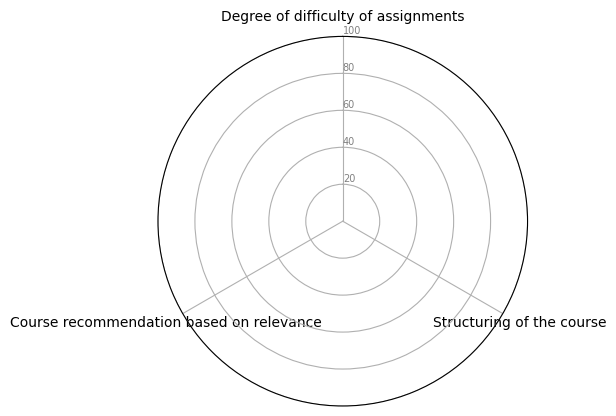

In [66]:
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(subplot_kw={'polar': True})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=7)
plt.ylim(0, 100)

In [72]:
'''
for i, row in df_grouped.iterrows():
    values = row[['Degree of difficulty of assignments','Structuring of the course','Course recommendation based on relevance']].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Course'])
    ax.fill(angles, values, 'b', alpha=0.1)
'''

for i, row in df_grouped.iterrows():
    values = row[['Degree of difficulty of assignments', 'Structuring of the course', 'Course recommendation based on relevance']].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Course'])
    ax.fill(angles, values, 'b', alpha=0.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


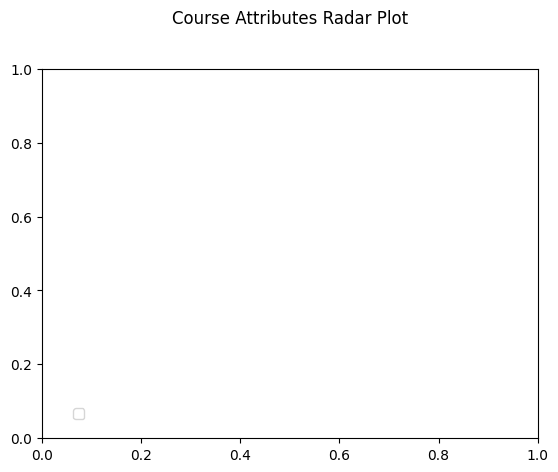

In [75]:
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
#plt.legend(bbox_to_anchor=(0.1, 0.1), labels=df_grouped['Course'])

plt.title('Course Attributes Radar Plot', size=12, y=1.1)
plt.show()

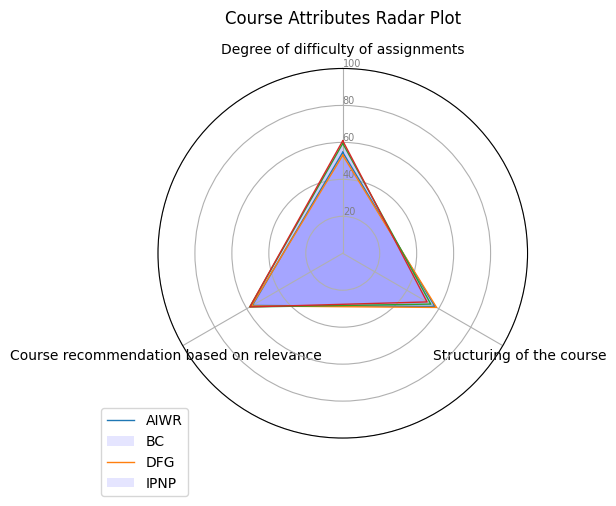

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('course_attributes.csv')

# Group the data
df_grouped = df_feedback_course.groupby('Course').mean().reset_index()
df_grouped['Course recommendation based on relevance'] = df_grouped['Course recommendation based on relevance']*10
df_grouped['Degree of difficulty of assignments'] = df_grouped['Degree of difficulty of assignments']*10
df_grouped['Structuring of the course'] = df_grouped['Structuring of the course']*10

# Set up the plot
attributes = ['Degree of difficulty of assignments', 'Structuring of the course', 'Course recommendation based on relevance']
N = len(attributes)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(subplot_kw={'polar': True})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], attributes)
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=7)
plt.ylim(0, 100)

# Add data to the plot
for i, row in df_grouped.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Course'])
    ax.fill(angles, values, 'b', alpha=0.1)

# Customize the plot
plt.legend(bbox_to_anchor=(0.1, 0.1), labels=df_grouped['Course'])
plt.title('Course Attributes Radar Plot', size=12, y=1.1)

# Show the plot
plt.show()
